/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Absolute Error (MAE): 0.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Mean Absolute Error (MAE): 6691.43
Mean Squared Error (MSE): 66470816.87
Root Mean Squared Error (RMSE): 8152.96
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


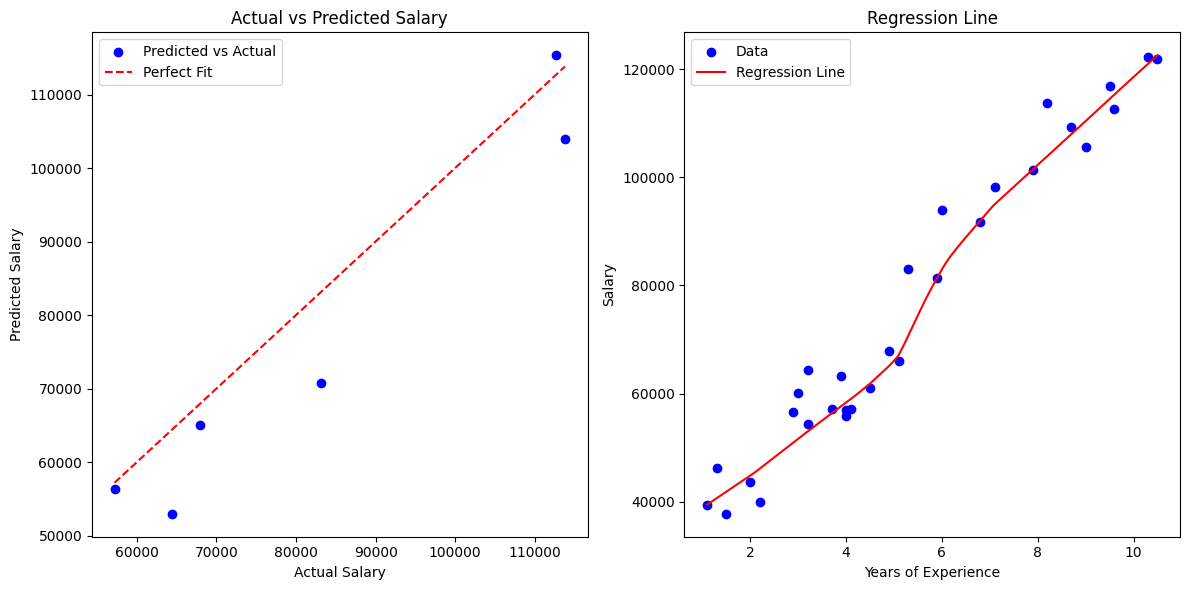

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

df = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')

X = df['YearsExperience'].values.reshape(-1, 1)
Y = df['Salary'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_mean, X_std = X_train.mean(), X_train.std()
Y_mean, Y_std = Y_train.mean(), Y_train.std()

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
Y_train = (Y_train - Y_mean) / Y_std
Y_test = (Y_test - Y_mean) / Y_std

model = Sequential([
    Dense(64, input_dim=1),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(1, activation='linear')
])

optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.1)

loss, mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Y_pred = model.predict(X_test)

Y_test_actual = Y_test * Y_std + Y_mean
Y_pred_actual = Y_pred * Y_std + Y_mean

mae_actual = mean_absolute_error(Y_test_actual, Y_pred_actual)
mse_actual = mean_squared_error(Y_test_actual, Y_pred_actual)
rmse_actual = np.sqrt(mse_actual)

print(f"Mean Absolute Error (MAE): {mae_actual:.2f}")
print(f"Mean Squared Error (MSE): {mse_actual:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_actual:.2f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_test_actual, Y_pred_actual, color='blue', label='Predicted vs Actual')
plt.plot([Y_test_actual.min(), Y_test_actual.max()], [Y_test_actual.min(), Y_test_actual.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df['YearsExperience'], df['Salary'], label='Data', color='blue')
X_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_line_scaled = (X_line - X_mean) / X_std
Y_line_scaled = model.predict(X_line_scaled)
Y_line = Y_line_scaled * Y_std + Y_mean
plt.plot(X_line, Y_line, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Line')
plt.legend()

plt.tight_layout()
plt.show()
